<a href="https://colab.research.google.com/github/Shriharsha123/Ransomware-Analysis-using-machine-learning/blob/main/DynamicRanML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First ML Project

## Load Data

In [15]:
import pandas as pd

df = pd.read_excel('https://raw.githubusercontent.com/Shriharsha123/Ransomware-Analysis-using-machine-learning/refs/heads/main/RDRpart1-2.csv', sheet_name=None)
df

{'Sheet1':          1  ID  2  Label (1 Ransomware / 0 Goodware)  3  Ransomware Family  4  \
 0    10001   1  5                                  0  0                  0  0   
 1    10002   0  0                                  0  0                  1  0   
 2    10003   0  0                                  1  0                  1  0   
 3    10005   0  0                                  1  0                  1  0   
 4    10006   0  0                                  0  0                  1  0   
 ..     ...  .. ..                                ... ..                ... ..   
 376  10794   1  2                                  1  0                  1  0   
 377  10795   0  0                                  0  0                  1  0   
 378  10797   1  6                                  0  0                  0  0   
 379  10802   1  9                                  0  0                  1  0   
 380  10803   1  9                                  0  0                  1  0   
 
    

## Data Preparation

## Data Separation as X and Y

In [20]:
y = df['Sheet1']['ID']
y

,ID
0,1
1,0
2,0
3,0
4,0
...,...
376,1
377,0
378,1
379,1


In [43]:
X = df['Sheet1'].drop('ID',axis=1).drop(1,axis=1)
X.columns = X.columns.astype(str)
X

,2,Label (1 Ransomware / 0 Goodware),3,Ransomware Family,4,API:GetSystemDirectoryA,5,API:WriteConsoleA,6,API:NtOpenFile,...,8183,FILES:OPENED:C:\Documents and Settings\MyUser\Local Settings\Temp\is-JHDLM.tmp\,8184,FILES:OPENED:C:\Program Files\Launch4j\w32api\,8185,FILES:OPENED:C:\Program Files\WinCalendar V4\,8186,FILES:OPENED:C:\Documents and Settings\MyUser\Local Settings\Temp\is-O4RI5.tmp\_isetup\,8187,FILES:OPENED:c:\d2881738649a323fde23ab\
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,2,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
378,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
379,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Splitting

In [65]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

y_train

,ID
203,0
98,1
345,1
3,0
20,1
...,...
343,0
359,0
323,1
280,1


In [29]:
y_test

,ID
163,0
297,1
103,0
249,0
260,0
...,...
326,1
361,1
358,1
6,1


# Model Building

## Random Forest

### Training the model

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(max_depth=20, random_state=100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=100)

### Applying the model to make a prediction

In [46]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)


### Evaluate model performance

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.0,1.0,0.025974,0.894665


## K-Nearest Neighbor(KNN)

### Training the model

In [48]:
#from sklearn.neighbors import KNeighborsRegressor
#neigh = KNeighborsRegressor(n_neighbors=2)
#neigh.fit(X, y)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

### Applying the model to make a prediction

In [49]:
y_neigh_train_pred = neigh.predict(X_train)
y_neigh_test_pred = neigh.predict(X_test)

### Evaluate model performance

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

neigh_train_mse = mean_squared_error(y_train, y_neigh_train_pred)
neigh_train_r2 = r2_score(y_train, y_neigh_train_pred)

neigh_test_mse = mean_squared_error(y_test, y_neigh_test_pred)
neigh_test_r2 = r2_score(y_test, y_neigh_test_pred)


neigh_results = pd.DataFrame(['K-Nearest Neighbor', neigh_train_mse, neigh_train_r2, neigh_test_mse, neigh_test_r2]).transpose()
neigh_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
neigh_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,K-Nearest Neighbor,0.009868,0.957589,0.012987,0.947332


## Support Vector Machines(SVMs)

### Training the model

In [51]:
from sklearn import svm
regr = svm.SVC()
regr.fit(X, y)

SVC()

### Applying the model to make a prediction

In [52]:
y_regr_train_pred = regr.predict(X_train)
y_regr_test_pred = regr.predict(X_test)

### Evaluating model performance

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

regr_train_mse = mean_squared_error(y_train, y_regr_train_pred)
regr_train_r2 = r2_score(y_train, y_regr_train_pred)

regr_test_mse = mean_squared_error(y_test, y_regr_test_pred)
regr_test_r2 = r2_score(y_test, y_regr_test_pred)


regr_results = pd.DataFrame(['Support vector machine', regr_train_mse, regr_train_r2, regr_test_mse, regr_test_r2]).transpose()
regr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
regr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Support vector machine,0.0,1.0,0.0,1.0


## Decision tree

### Training the model

In [54]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

### Applying the model to make a prediction

In [55]:
y_clf_train_pred = clf.predict(X_train)
y_clf_test_pred = clf.predict(X_test)


### Evaluating model performance

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score

clf_train_mse = mean_squared_error(y_train, y_clf_train_pred)
clf_train_r2 = r2_score(y_train, y_clf_train_pred)

clf_test_mse = mean_squared_error(y_test, y_clf_test_pred)
clf_test_r2 = r2_score(y_test, y_clf_test_pred)


clf_results = pd.DataFrame(['Decision tree', clf_train_mse, clf_train_r2, clf_test_mse, clf_test_r2]).transpose()
clf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
clf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Decision tree,0.0,1.0,0.0,1.0


# Model comparison

In [58]:
#df_models = pd.concat([lr_results, rf_results, neigh_results, regr_results, clf_results], axis=0)
df_models = pd.concat([rf_results, neigh_results, regr_results, clf_results], axis=0)

In [59]:

df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.0,1.0,0.025974,0.894665
1,K-Nearest Neighbor,0.009868,0.957589,0.012987,0.947332
2,Support vector machine,0.0,1.0,0.0,1.0
3,Decision tree,0.0,1.0,0.0,1.0


# Data visualization of prediction results

In [60]:
import matplotlib.pyplot as plt
import numpy as np


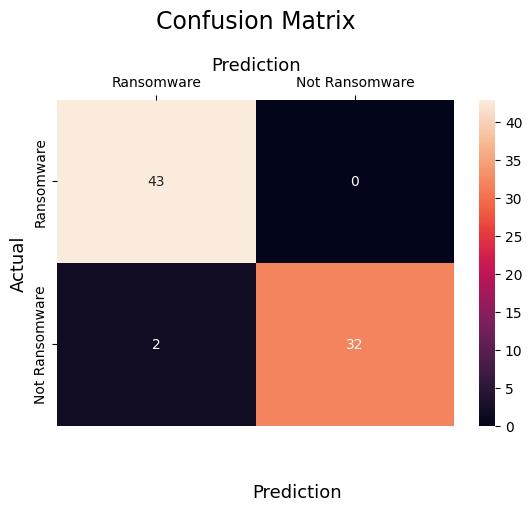

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test, y_rf_test_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Ransomware','Not Ransomware'],
            yticklabels=['Ransomware','Not Ransomware'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

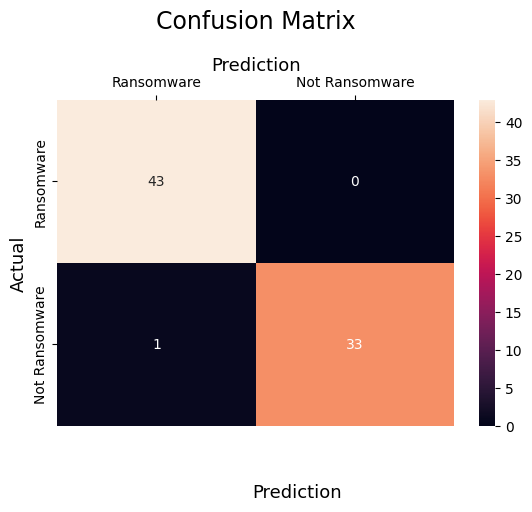

'X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)\nfor class_value in range(2):\n row_ix = where(y == class_value)\n plt.scatter(X[row_ix, 0], X[row_ix, 1])\nplt.show()'

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.datasets import make_blobs
cm=confusion_matrix(y_test, y_neigh_test_pred)

#test_rans=[i for i in range(X_test) if(y_test[i]==1)]
#test_good=[i for i in range(X_test) if(y_test[i]==0)]
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Ransomware','Not Ransomware'],
            yticklabels=['Ransomware','Not Ransomware'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

'''X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
for class_value in range(2):
 row_ix = where(y == class_value)
 plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()'''
#from sklearn.metrics import RocCurveDisplay

#RocCurveDisplay(fpr, tpr, roc_auc=None, estimator_name=None, pos_label=None)

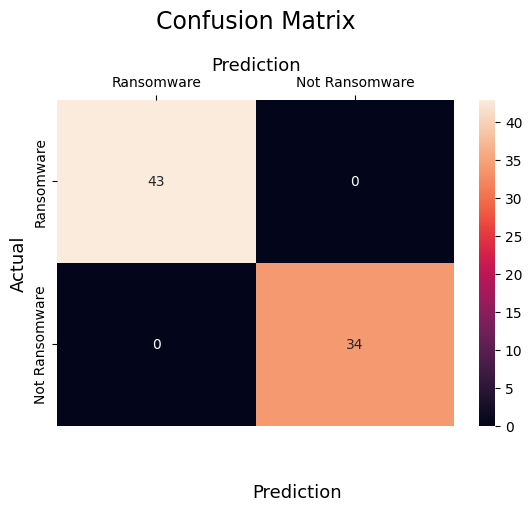

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test, y_regr_test_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Ransomware','Not Ransomware'],
            yticklabels=['Ransomware','Not Ransomware'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

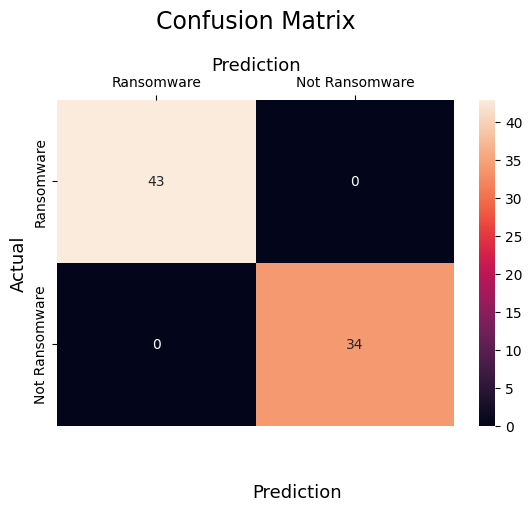

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test, y_clf_test_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Ransomware','Not Ransomware'],
            yticklabels=['Ransomware','Not Ransomware'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()